# Athena : Grid-based code for astrophysical magnetohydrodynamics (MHD)

In this notebook we will discover how to use (and extend) a community code called **athena**. You can use the ASCL service to find out more about such a code (although google can sometimes be effective too):
http://ascl.net/athena should redirect you to the relevant ASCL entry or entries for that code.

In fact, you will discover two codes came up with this name.

You will need to use the terminal as well in this notebook.  An in-depth discussion of MHD codes is beyond our current scope, but we have to recall that python is not always the best code to implement codes that need a large number of computations.  An example of a related problem that was solved in a notebook using python, is the heat equation using the Crank-Nickelson method, and is described [here](http://nbviewer.jupyter.org/github/waltherg/notebooks/blob/master/2013-12-03-Crank_Nicolson.ipynb).

## 1. downloading

Following the code site we will find a link on https://trac.princeton.edu/Athena/wiki/AthenaDocsDownLd or you can also use that link in a terminal and use the command
```
   wget http://www.astro.princeton.edu/~jstone/downloads/athena/athena4.2.tar.gz
   tar zxf athena4.2.tar.gz
```
or
``` 
   curl http://www.astro.princeton.edu/~jstone/downloads/athena/athena4.2.tar.gz | tar zxf -
```
depending on which program you have, or what method you prefer. Either way, you will now have the athena directory.

If there are problems, a private github repo on https://github.com/astroumd/athena4.2 has been maintained with a smaller number of dependencies, including some example data that can be directly used for analysis. Contact the owner(s) for a snapshot if you need one.

## 2a. configuring, compiling and testing

The athena program is written in the C language, so it must be compiled first. python is an interpreted language, so it does not need this step. compiled languages are generally many times (sometimes 10 or 100 or even 1000) faster than their equivalent code in interpreted languages. However, developing in a language like python can often be a lot faster than in a compiled language.

```
   cd athena-4.2
   ls
   autoconf
```
this is where you might see a **command not found** error message. That's a sign of trouble. It means your system does not have some basic tools installed, buy [autoconf](https://github.com/edrosten/autoconf_tutorial) is one needed for athena. Either you install this tool, e.g.
```
   sudo apt-get install autoconf                     # example on ubuntu
```

or grab the private repo version as discussed before. Assuming we have this problem solved, we continue with
```
   ./configure 
   ...
   
Your Athena distribution has now been configured:

--- Physics Options ---

Problem:                 linear_wave
Gas properties:          MHD
Equation of State:       ADIABATIC
Coordinate System:       CARTESIAN
Advected scalar fields:  0
Self-gravity:            OFF
Resistivity:             OFF
Viscosity:               OFF
Thermal conduction:      OFF
Particles:               OFF
Special Relativity:      OFF

--- Algorithm Options ----

Spatial Order:           3 (THIRD_ORDER_CHAR)
Flux:                    roe
unsplit integrator:      ctu
Precision:               DOUBLE_PREC
Compiler options:        -O3
Ghost cell output:       OFF
Parallel modes: MPI      OFF
H-correction:            OFF
FFT:                     OFF
Shearing-box:            OFF
FARGO:                   OFF
Super timestepping:      OFF
Static Mesh Refinement:  OFF
first-order flux corr:   OFF
ROTATING_FRAME:          OFF
L1_INFLOW:               OFF

```
   Now your athena has been set up for a particular problem (the linear wave) in 1D. If you want to learn more about the options to configure, use
   
```
    ./configure --help
```
Compilation is a simple
```
    make all
```
after this there will be a binary in the directory **bin/athena**. There is a standard simple test (in 1D) that acts like a benchmark to see how fast the code is. This also allows you very easily to test out if there are certain compile flags that will optimize the code even better.
```
    make test
(cd tst/1D-mhd; ./run.test)
zone-cycles/cpu-second = 9.116444e+05
zone-cycles/wall-second = 8.969274e+05
L1 norm for density: 2.665900e-11
```   
Inspecting the **run.test** script will be instructive to see how you run and modify this program.

**Q1:**  how do you compile a version of the program with the "-g" debug option?  The code should run a little slower. How about "-g -O0", meaning with no optimization (sometimes you need to shut up the compiler from optimizing even in debug mode). Hint:

## 2b. the 1D (pure hydro) Sod shocktube

The default test (1D MHD linear wave) is not what we want to do today. Lets take a simpler pure hydro case, in 1D, of a peculiar shock tube that is often used to test the accuracy of hydro codes. See also
https://en.wikipedia.org/wiki/Sod_shock_tube

For this athena needs to be re-configured and re-compiled:

```
    make clean
    ./configure --with-gas=hydro --with-problem=shkset1d
    make all
    bin/athena -h
```

## 3. running 

By default, the executable is in **bin/athena**. This also implies that you would need to make a backup,or rename the executable, to be able to run a variety of problems.  The **-h** flag will always remind you which version of athena you are running, viz.
```
    bin/athena -h
Athena version 4.2 - 27-Nov-2016
  Last configure: Fri Nov 18 12:58:27 EST 2016
  
Usage: bin/athena [options] [block/par=value ...]

Options:
  -i <file>       Alternate input file [athinput]
  ...
  
Configuration details:

 Problem:                 shkset1d
 Gas properties:          HYDRO
 ...

```

From the previous analysis you should find an example in **tst/1D-hydro/athinput.sod**

```
  mkdir run1
  cd run1
  cp ../tst/1D-hydro/athinput.sod .
  ../bin/athena -i athinput.sod  time/tlim=1.0
```


## 4. analysis

This assumes you now have a series of ascii table (** \*.tab **) in your run directory. For this test, see also the **athinput.sod** file, you should see maxout=2 and the **tab** and **hst** output streams. The latter summarizes the history, and lists some conservation values (e.g. total mass, timesteps).



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import ascii

Implement some example reading routines, to return the cell number, position, density, velocity and pressure as NumPy arrays.


In [2]:
def ReadData1(file, fid=0):
    data = ascii.read(file)
    i = data['col1']
    x = data['col2']
    d = data['col3']
    v = data['col4']
    p = data['col7']
    return (i,x,d,v,p)
    

In [3]:
def ReadData2(file,fid=0):
    data = np.loadtxt(file).T     # read rows, but transpose to get to the columns
    i = data[0]
    x = data[1]
    d = data[2]
    v = data[3]
    p = data[6]
    return (i,x,d,v,p)

In [4]:
def ReadData2a(file,fid=0):
    (i,x,d,v,v2,v3,p) = np.loadtxt(file).T  
    return (i,x,d,v,p)

In [5]:
def ReadData3(file, fid=None):
    if fid == None:
        fname = file
    else:
        fname = file % fid    
    return ReadData2(fname)

In [6]:
def PlotData(x,y,title):
    plt.plot(x,y)
    plt.title(title)
    plt.xlim(-0.5,0.5)
    plt.show()
    
def PlotData2(x1,y1,x2,y2,title):
    pass

In [14]:
#  use this for ReadData1/2
ReadData = ReadData1
fname = '../../athena4.2/run1/Sod.0025.tab'

In [15]:
# use this for ReadData3
#ReadData = ReadData3
#fname = '../../athena4.2/run1/Sod.%04d.tab'
#fid = 25

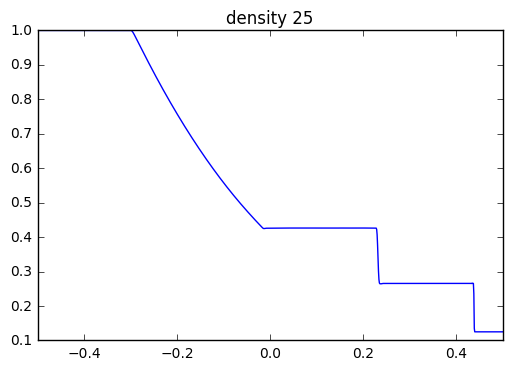

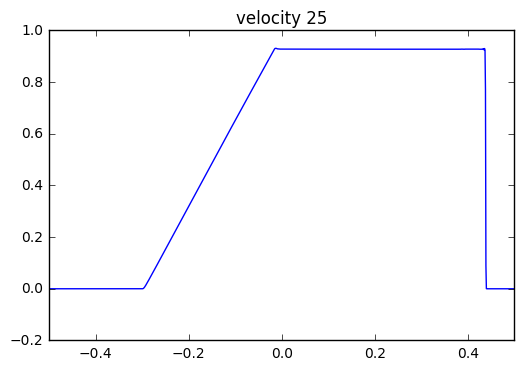

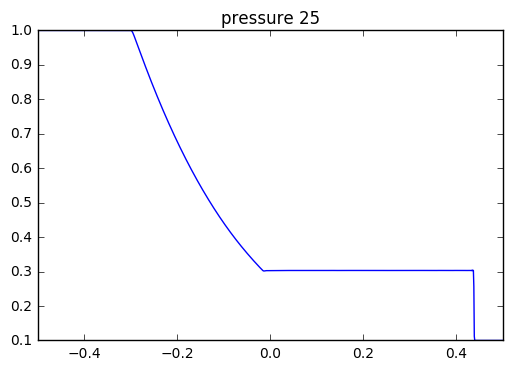

In [16]:
# Read and Plot the Data
(ix,x,d,v,p) = ReadData(fname,fid)
PlotData(x,d,"density %d" % fid)
PlotData(x,v,"velocity %d" % fid)
PlotData(x,p,"pressure %d" % fid)        



Q1:  Can you confirm is the Courant condition is maintained?  By how much?

In [ ]:
dt=3.56e-4
Nx1 = 1024
dx = 1.0/Nx1
c = v*dt/dx
#
PlotData(x,c,"courant %d" % fid)        

Q2:  Now implementing **PlotData2**, how would you overplot a solution from a 32 zone grid, with that of the default 1024.

In [ ]:
def PlotData2(x1,y1,x2,y2,title):
    plt.plot(x1,y1)
    plt.plot(x2,y2)
    plt.title(title)
    plt.xlim(-0.5,0.5)
    plt.show()    

In [ ]:
fname2 = '../../athena4.2/run2/Sod.%04d.tab'
fid2 = 21

(ix2,x2,d2,v2,p2) = ReadData(fname2,fid2)
PlotData(x2,d2,"density %d" % fid2)
PlotData2(x,d,x2,d2,"density at two runs")